<a href="https://colab.research.google.com/github/emm-gl/Referenz/blob/master/Project_mna/CNN_Noise_v06_egonzalez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creación del modelo:

In [40]:
#importan librerias

#Librerias base
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import os
import cv2

from glob import glob
#Librerias de modelado
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.applications import VGG16

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

In [41]:
####Cargar imágenes desde Google drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
#"/content/drive/My Drive/final_project/

In [43]:
#Funcion para leer las imagenes de un folder
def load_folder_with_label(folder_path,label, size = (128,128)):
  files = glob(os.path.join(folder_path,"*"))
  X = list(map(plt.imread, files))
  X = [cv2.resize(img,size) for img in X]
  y = [label] * len(X)
  return X,y

In [44]:
image_size = (128,128)

In [45]:
#Cargamos los datos de entrenamiento de la clase 0 y clase 1
X_0, y_0 = load_folder_with_label("/content/drive/My Drive/final_project/train/ok_images_train", 1, size = image_size)
X_1, y_1 = load_folder_with_label("/content/drive/My Drive/final_project/train/nok_images_train", 0, size = image_size)
X = X_0 + X_1
y = y_0 + y_1
del X_0 , X_1, y_0 , y_1

In [46]:
#Cargamos los datos de validacion de la clase 0 y clase 1
X_validation_0, y_validation_0 = load_folder_with_label("/content/drive/My Drive/final_project/validation/ok_images_val", 1, size = image_size)
X_validation_1, y_validation_1 = load_folder_with_label("/content/drive/My Drive/final_project/train/validation/nok_images_val", 0, size = image_size)
X_validation = X_validation_0 + X_validation_1
y_validation = y_validation_0 + y_validation_1
del X_validation_0 , X_validation_1, y_validation_0 , y_validation_1

In [47]:
#Cargamos los datos de test de la clase 0 y clase 1
X_test_0, y_test_0 = load_folder_with_label("/content/drive/My Drive/final_project/test/ok_images_test", 1, size = image_size)
X_test_1, y_test_1 = load_folder_with_label("/content/drive/My Drive/final_project/test/nok_images_test", 0, size = image_size)
X_test = X_test_0 + X_test_1
y_test = y_test_0 + y_test_1
del X_test_0 , X_test_1, y_test_0 , y_test_1

In [48]:
#codificamos la target
lbl = LabelEncoder()
lbl.fit(y + y_validation + y_test)

LabelEncoder()

In [49]:
y = lbl.transform(y)
y_validation = lbl.transform(y_validation)
y_test = lbl.transform(y_test)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

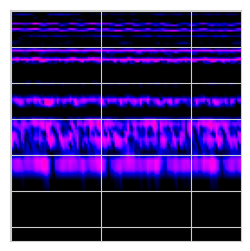

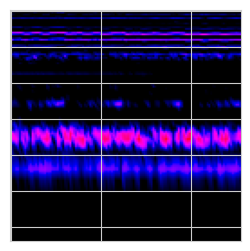

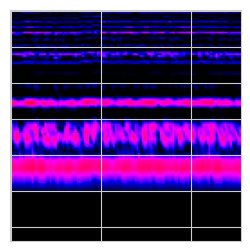

In [50]:
#Vistazo a nuestro dataset
for img in X[:3]:
  plt.figure(figsize = (3,3))
  plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
  plt.imshow(img, cmap = "gray")
  plt.show()

In [51]:
X = np.array(X)
X_validation = np.array(X_validation)
X_test = np.array(X_test)

In [52]:
X.shape

(563, 128, 128, 4)

In [53]:
X_train = X
y_train = y

In [54]:
y.shape

(563,)

In [55]:
# Crear el modelo secuencial
model = Sequential()

#Primer capa
model.add(Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(image_size[0], image_size[1], 4)))
model.add(MaxPooling2D(pool_size=(2,2)))

#Segunda capa
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Tercer capa
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Aplanamiento
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16, activation='relu'))


# Capa densa de salida con una neurona y activación 'sigmoid' para clasificación binaria
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
#Resumen de la arquitectura del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 16)        │             592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 829,233 (3.16 MB)

 Trainable params: 829,233 (3.16 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
class_weights = {0: 1.5, 1: 1.0}

# Compilar el modelo con el optimizador 'adam', la función de pérdida BinaryCrossentropy y métricas de precisión
model.compile(optimizer='adam',
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])
# Entrenar el modelo con los datos de entrenamiento y validar con los datos de prueba

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_validation, y_validation), class_weight=class_weights)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 245ms/step - accuracy: 0.4689 - loss: 0.8989 - val_accuracy: 0.0000e+00 - val_loss: 0.9283
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5118 - loss: 0.8146 - val_accuracy: 0.0000e+00 - val_loss: 0.7538
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5425 - loss: 0.7674 - val_accuracy: 0.5750 - val_loss: 0.7289
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5873 - loss: 0.7343 - val_accuracy: 0.3500 - val_loss: 0.7638
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5838 - loss: 0.7169 - val_accuracy: 0.2000 - val_loss: 0.8347
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6130 - loss: 0.7032 - val_accuracy: 0.8000 - val_loss: 0.8107
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6508 - loss: 0.7259 - val_accuracy: 0.8500 - val_loss: 0.7557
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5769 - loss: 0.7435 - val_accuracy: 

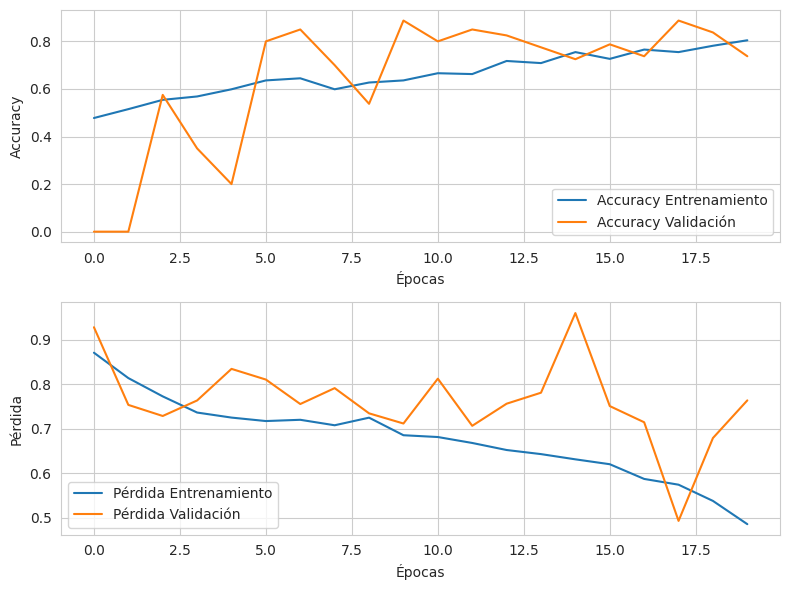

In [58]:
# Obtén los datos del historial
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Crea la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Gráfica de accuracy
ax1.plot(accuracy, label='Accuracy Entrenamiento')
ax1.plot(val_accuracy, label='Accuracy Validación')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Gráfica de pérdida
ax2.plot(loss, label='Pérdida Entrenamiento')
ax2.plot(val_loss, label='Pérdida Validación')
ax2.set_xlabel('Épocas')
ax2.set_ylabel('Pérdida')
# plt.ylim(None,.8)
ax2.legend()

# Ajusta los márgenes y espacios entre subplots
plt.tight_layout()

# Muestra las gráficas
plt.show()

In [59]:
y_proba_train = model.predict(X_train)
y_pred_train = y_proba_train.round().astype(int)
y_proba_test = model.predict(X_test)
y_pred_test = y_proba_test.round().astype(int)
y_proba_validation = model.predict(X_validation)
y_pred_validation = y_proba_validation.round().astype(int)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [60]:
lbl = LabelEncoder()
target_names = ['class 1', 'class 0']
#Class 0 = NOK
#Class 1 = OK

In [61]:
print("Train sample \n", classification_report(y_train, y_pred_train, target_names = target_names))
print("Test sample \n", classification_report(y_test, y_pred_test, target_names = target_names))
print("Validation sample \n", classification_report(y_validation, y_pred_validation, target_names = target_names))

Train sample 
               precision    recall  f1-score   support

     class 1       0.84      0.89      0.86       283
     class 0       0.88      0.83      0.85       280

    accuracy                           0.86       563
   macro avg       0.86      0.86      0.86       563
weighted avg       0.86      0.86      0.86       563

Test sample 
               precision    recall  f1-score   support

     class 1       0.64      0.68      0.66        40
     class 0       0.66      0.62      0.64        40

    accuracy                           0.65        80
   macro avg       0.65      0.65      0.65        80
weighted avg       0.65      0.65      0.65        80

Validation sample 
               precision    recall  f1-score   support

     class 1       0.00      0.00      0.00         0
     class 0       1.00      0.74      0.85        80

    accuracy                           0.74        80
   macro avg       0.50      0.37      0.42        80
weighted avg       1.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


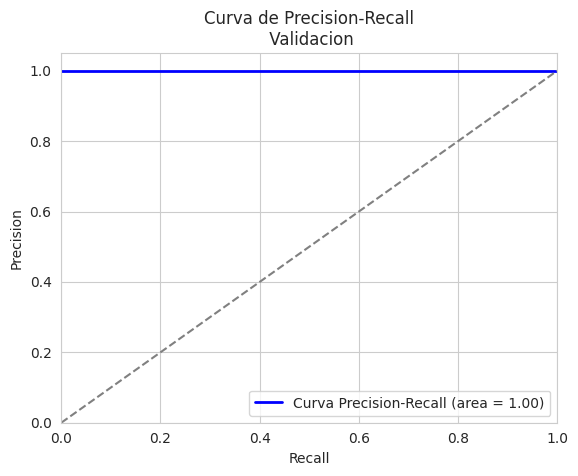

In [62]:
precision, recall, thresholds = precision_recall_curve(y_validation, y_pred_validation)

auc_pr = average_precision_score(y_validation, y_pred_validation)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Curva Precision-Recall (area = {auc_pr:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precision-Recall\n Validacion')

plt.legend(loc="lower right")
plt.show()

In [63]:
!pip install -q scikit-plot
import scikitplot as skplt

/usr/local/lib/python3.10/dist-packages/scikitplot/metrics.py:124: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


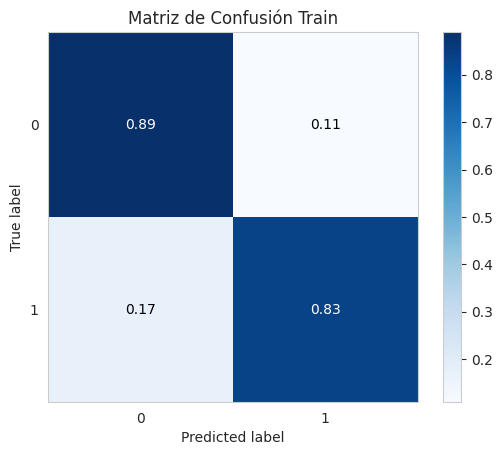

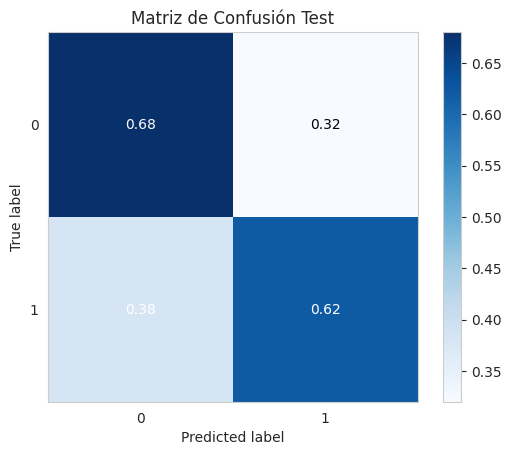

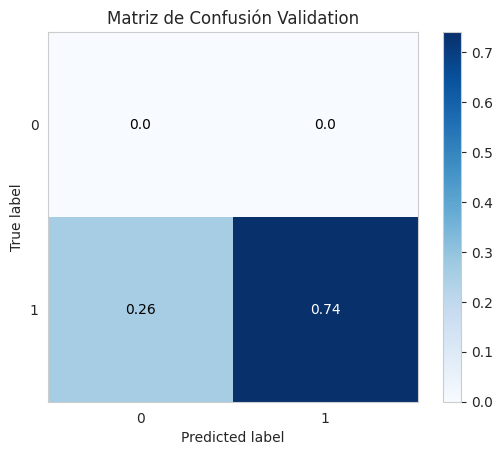

In [64]:
# Gráfico de Matriz de Confusión
skplt.metrics.plot_confusion_matrix(y_train, y_pred_train, normalize=True)
plt.title('Matriz de Confusión Train')

skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True)
plt.title('Matriz de Confusión Test')

skplt.metrics.plot_confusion_matrix(y_validation, y_pred_validation, normalize=True)
plt.title('Matriz de Confusión Validation')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [80, 160]

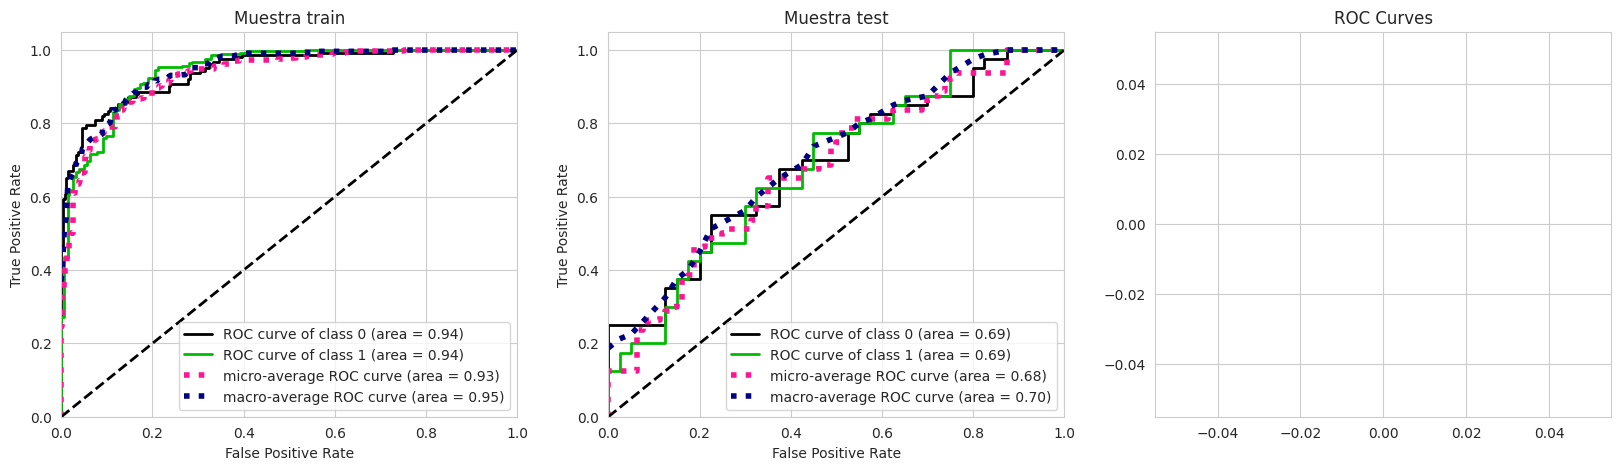

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

skplt.metrics.plot_roc(y_train, np.column_stack((1-y_proba_train, y_proba_train)), ax=axes[0])
axes[0].set_title("Muestra train")

skplt.metrics.plot_roc(y_test, np.column_stack((1-y_proba_test, y_proba_test)), ax=axes[1])
axes[1].set_title("Muestra test")

skplt.metrics.plot_roc(y_validation, np.column_stack((1-y_proba_validation, y_proba_validation)), ax=axes[2])
axes[2].set_title("Muestra validation")
axes[2].legend(loc="lower right")


##Prueba del modelo:

In [66]:
input_tensor = model.inputs
print(f"Tensor de entrada: {input_tensor}")

Tensor de entrada: [<KerasTensor shape=(None, 128, 128, 4), dtype=float32, sparse=None, name=keras_tensor_92>]


In [67]:
# Directorio donde están las imágenes
data_dir = '/content/drive/My Drive/final_project/images_for_testing/01.Page81.png'

In [68]:
!ls '/content/drive/My Drive/final_project/images_for_testing/'

01.Page81.png  01.Page82.png  01.Page83.png


In [70]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Cargar la imagen
image_path = data_dir
image = plt.imread(data_dir)
size = (128,128)
image = cv2.resize(img,size)

# Convertir la imagen a un array numpy y normalizar los valores de los píxeles
image_array = img_to_array(image) / 255.0

# Agregar una dimensión extra para convertir la imagen en un lote de un solo elemento
image_array = tf.expand_dims(image_array, axis=0)

# Pasar la imagen al modelo para hacer una predicción
prediction = model.predict(image_array)

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
[[0.5694445]]


In [71]:
#Give the result:

if(prediction > 0.5):
  print("The image is NOK")
else:
  print("The image is OK")

The image is NOK


## Exportación del modelo:

In [77]:
#Exportar el modelo en formato h5
model.save('noise.h5')

In [72]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

In [74]:
#Crear carpeta donde se colocaran los archivos resultantes
!mkdir carpeta_salida

In [78]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras noise.h5 carpeta_salida

2024-06-13 01:14:24.626138: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
failed to lookup keras version from the file,
    this is likely a weight only file


In [79]:
#Confirmar que en la carpeta de salida se hayan generado los archivos. Deben aparecer archivos "bin" y "json"
!ls carpeta_salida

group1-shard1of1.bin  model.json
